Import gdown library to download the given dataset using download() function
Download the dataset file

In [ ]:
import gdown
url = 'https://drive.google.com/uc?id=1ZWaN2ZxaRQOO65mkALusy_F4OywYWoU6'
output = 'dataset.csv'  # Output file name
gdown.download(url, output, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1ZWaN2ZxaRQOO65mkALusy_F4OywYWoU6
To: /content/dataset.csv
100%|██████████| 129k/129k [00:00<00:00, 76.0MB/s]


'dataset.csv'

From the given dataset , let's start with some exploratory data analysis (EDA). EDA aids in data comprehension, pattern recognition, and insight generation. Here is an illustration of how to apply EDA on the dataset:
First, loading the necessary libraries.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.decomposition import PCA


Reading CSV file which was downloaded from the website
Reading CSV file which was downloaded from the website

In [ ]:
nba_df=pd.read_csv('dataset.csv')
nba_df.head()

,Name,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
0,Brandon Ingram,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,...,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0.0
1,Andrew Harrison,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,...,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0.0
2,JaKarr Sampson,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,...,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0.0
3,Malik Sealy,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,...,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1.0
4,Matt Geiger,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,...,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1.0


Total number of rows is 1340 and columns is 21

In [ ]:
nba_df.shape

(1340, 21)

Data Type information of all features

In [ ]:
nba_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         1340 non-null   object 
 1   GP           1340 non-null   int64  
 2   MIN          1340 non-null   float64
 3   PTS          1340 non-null   float64
 4   FGM          1340 non-null   float64
 5   FGA          1340 non-null   float64
 6   FG%          1340 non-null   float64
 7   3P Made      1340 non-null   float64
 8   3PA          1340 non-null   float64
 9   3P%          1329 non-null   float64
 10  FTM          1340 non-null   float64
 11  FTA          1340 non-null   float64
 12  FT%          1340 non-null   float64
 13  OREB         1340 non-null   float64
 14  DREB         1340 non-null   float64
 15  REB          1340 non-null   float64
 16  AST          1340 non-null   float64
 17  STL          1340 non-null   float64
 18  BLK          1340 non-null   float64
 19  TOV   

In [ ]:
nba_df.columns

Index(['Name', 'GP', 'MIN', 'PTS', 'FGM', 'FGA', 'FG%', '3P Made', '3PA',
       '3P%', 'FTM', 'FTA', 'FT%', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK',
       'TOV', 'TARGET_5Yrs'],
      dtype='object')

In [ ]:
nba_df.describe()

,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
count,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1329.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000
mean,60.414179,17.624627,6.801493,2.629104,5.885299,44.169403,0.247612,0.779179,19.308126,1.297687,1.821940,70.300299,1.009403,2.025746,3.034478,1.550522,0.618507,0.368582,1.193582,0.620149
std,17.433992,8.307964,4.357545,1.683555,3.593488,6.137679,0.383688,1.061847,16.022916,0.987246,1.322984,10.578479,0.777119,1.360008,2.057774,1.471169,0.409759,0.429049,0.722541,0.485531
min,11.000000,3.100000,0.700000,0.300000,0.800000,23.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000,0.300000,0.000000,0.000000,0.000000,0.100000,0.000000
25%,47.000000,10.875000,3.700000,1.400000,3.300000,40.200000,0.000000,0.000000,0.000000,0.600000,0.900000,64.700000,0.400000,1.000000,1.500000,0.600000,0.300000,0.100000,0.700000,0.000000
50%,63.000000,16.100000,5.550000,2.100000,4.800000,44.100000,0.100000,0.300000,22.400000,1.000000,1.500000,71.250000,0.800000,1.700000,2.500000,1.100000,0.500000,0.200000,1.000000,1.000000
75%,77.000000,22.900000,8.800000,3.400000,7.500000,47.900000,0.400000,1.200000,32.500000,1.600000,2.300000,77.600000,1.400000,2.600000,4.000000,2.000000,0.800000,0.500000,1.500000,1.000000
max,82.000000,40.900000,28.200000,10.200000,19.800000,73.700000,2.300000,6.500000,100.000000,7.700000,10.200000,100.000000,5.300000,9.600000,13.900000,10.600000,2.500000,3.900000,4.400000,1.000000


nba_df.describe() function gives the description of the dataset such as count,mean,standard deviation, min,max,25,50 and 75 percentiles. Count gives 1340 rows as total number of rows for all columns. Mean gives the mean value of all feature variables similarly standard deviation. Min value is zero for all feature variables except GP,MIN and FG% column. Max value is 82 for GP column.

In [ ]:
null_values = nba_df.isnull().sum()
print(null_values)


Name            0
GP              0
MIN             0
PTS             0
FGM             0
FGA             0
FG%             0
3P Made         0
3PA             0
3P%            11
FTM             0
FTA             0
FT%             0
OREB            0
DREB            0
REB             0
AST             0
STL             0
BLK             0
TOV             0
TARGET_5Yrs     0
dtype: int64


Checking whether there are null values or not... True means 'Yes' there are null values and False means there are 'No' null values

In [ ]:
nba_df.isnull()

,Name,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1335,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1336,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1337,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1338,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
df = nba_df.drop(['3P%'],axis=1)

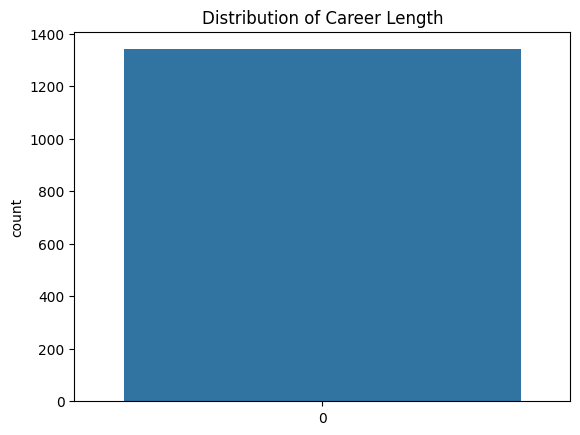

In [ ]:
# Distribution of the target variable
sns.countplot(nba_df['TARGET_5Yrs'])
plt.title('Distribution of Career Length')
plt.show()

In correlation features which have higher correlation have a positive value greater than 0 and those with negative values less than 0 show lesser correlation. The features having bigger correlation values shows bigger relation between them. So the following plot gives a heatmap with the correlation matrix.

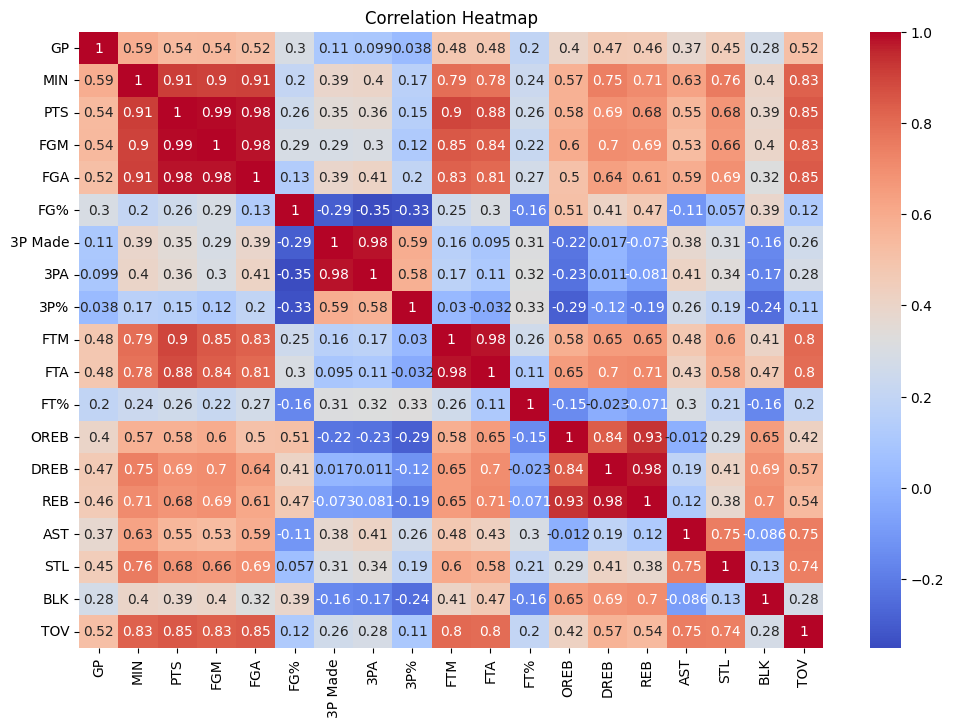

In [ ]:
# Correlation heatmap of numerical features
numerical_cols = ['GP', 'MIN', 'PTS', 'FGM', 'FGA', 'FG%', '3P Made', '3PA', '3P%', 'FTM', 'FTA', 'FT%',
                  'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK', 'TOV']
plt.figure(figsize=(12, 8))
sns.heatmap(nba_df[numerical_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


Box plots of numerical features by career length. We produce box plots of the numerical characteristics by career duration to acquire insight into the link between the numerical data and the target variable 'TARGET_5Yrs'. This enables us to see if the distributions of the two classes differ in any way.

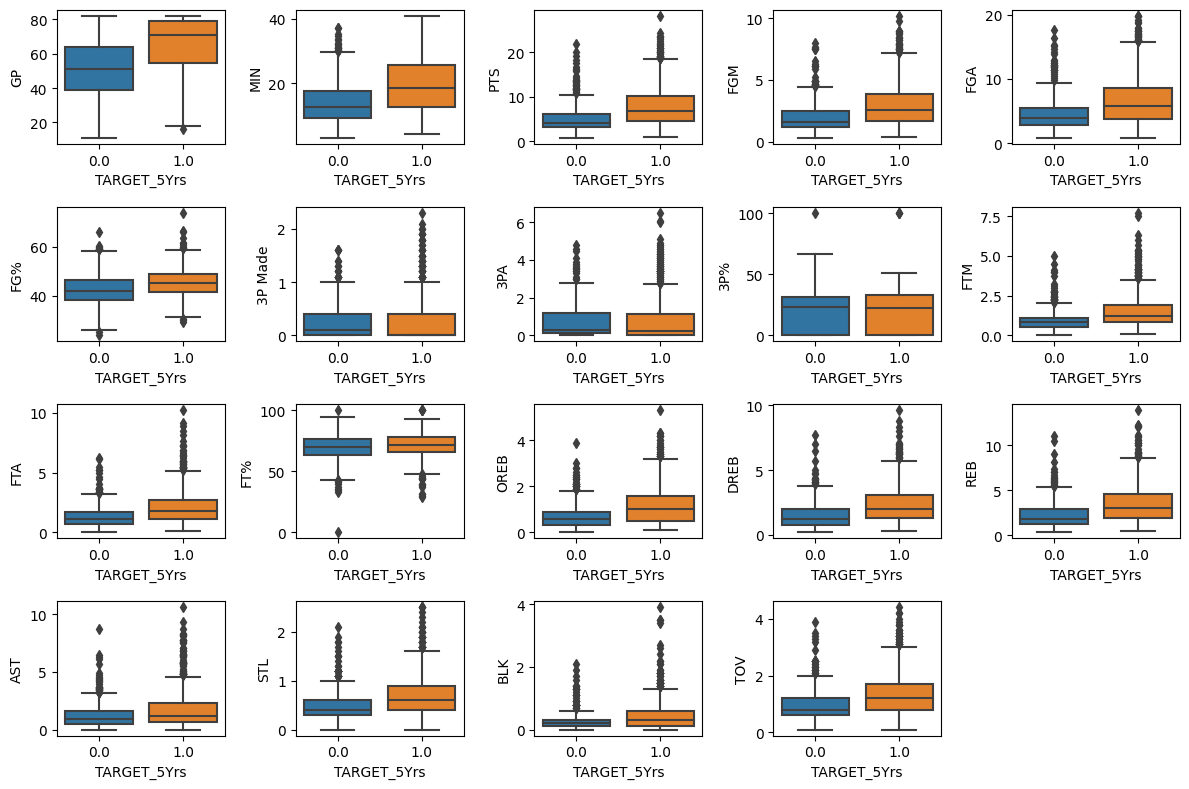

In [ ]:

plt.figure(figsize=(12, 8))
for col in numerical_cols:
    plt.subplot(4, 5, numerical_cols.index(col) + 1)
    sns.boxplot(x=nba_df['TARGET_5Yrs'], y=nba_df[col])
plt.tight_layout()
plt.show()



Pairplot of selected numerical features. To display pairwise correlations between chosen numerical characteristics, I develop a pairplot as follow diagram. The pairplot is showing distinctions or trends between the classes.




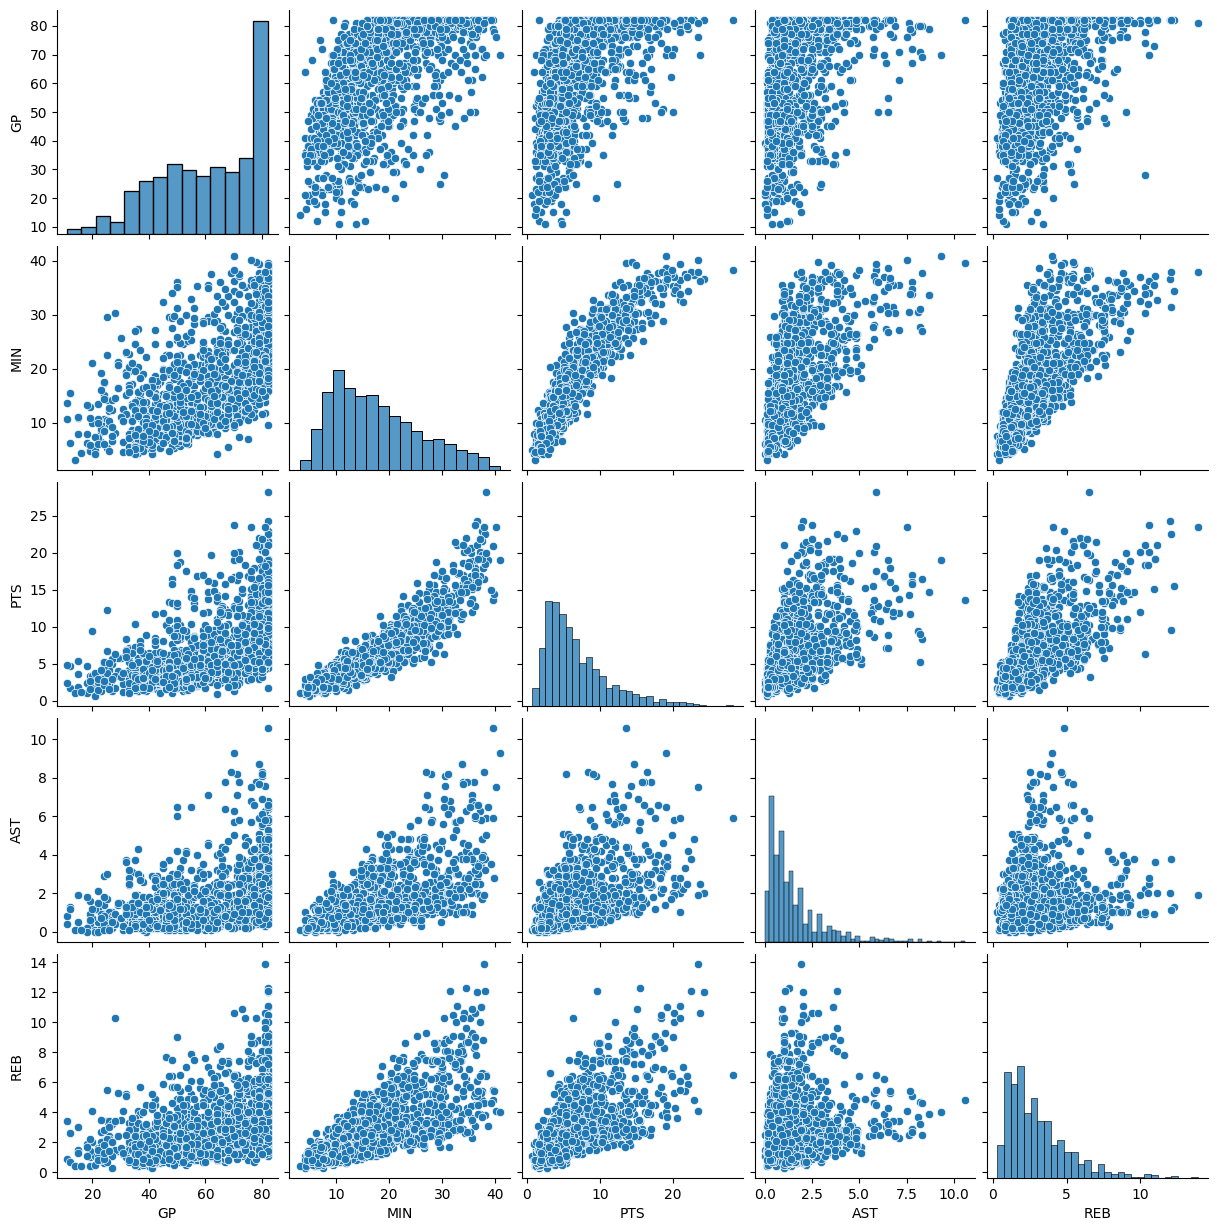

In [ ]:
selected_cols = ['GP', 'MIN', 'PTS', 'AST', 'REB']
sns.pairplot(nba_df[selected_cols])
plt.show()

Generating a histogram of all features except Name column.

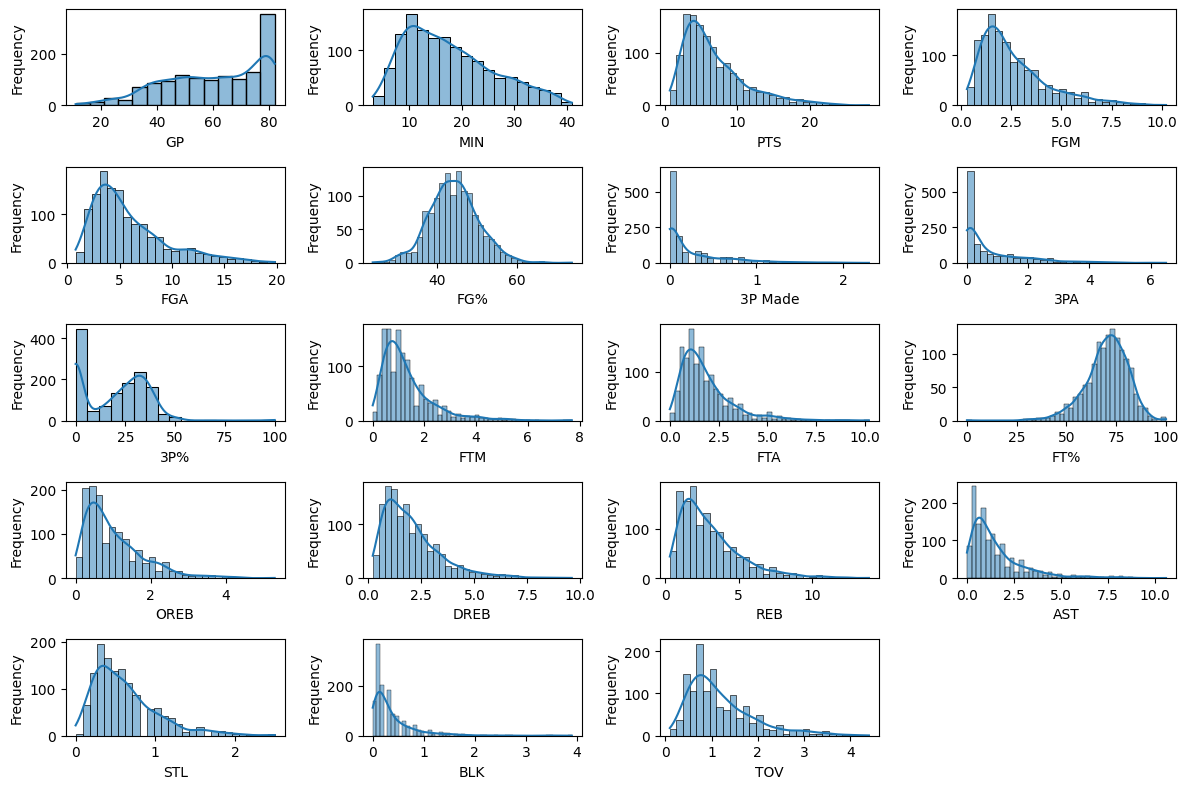

In [ ]:
# Select the numerical columns
numerical_cols = ['GP', 'MIN', 'PTS', 'FGM', 'FGA', 'FG%', '3P Made', '3PA', '3P%', 'FTM', 'FTA', 'FT%',
                  'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK', 'TOV']

# Plot histograms for each numerical feature
plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_cols):
    plt.subplot(5, 4, i+1)
    sns.histplot(nba_df[col], kde=True)
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


The above diagram spot any characteristics that resemble a Gaussian distribution some degree of skewness (asymmetry) using the histogram plots that were created.

Run NB algorithm: Train and Test is splited 80-20 rule for the prediction.

In [ ]:
X=nba_df[['GP', 'MIN', 'PTS', 'FGM', 'FGA', 'FG%', '3P Made','FT%','TOV']]
y = nba_df['TARGET_5Yrs']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=244)

# Perform feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train the Naive Bayes model
model = GaussianNB()
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Make predictions on the train set
y_pred_train = model.predict(X_train_scaled)

# Evaluate the model
accuracy_test = accuracy_score(y_test, y_pred)
print("Accuracy Test: {:.2f}%".format(accuracy_test * 100))
accuracy_train = accuracy_score(y_train, y_pred_train)
print("Accuracy Train: {:.2f}%".format(accuracy_train * 100))


Accuracy Test: 64.55%
Accuracy Train: 64.09%


Here, the accuracy for Train and Test for Naive Bayes algorith is 64.09% and 64.55%.

In [ ]:
# Create and train the Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Make predictions on the train set
y_pred_train = model.predict(X_train_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Test: {:.2f}%".format(accuracy * 100))
accuracy = accuracy_score(y_train, y_pred_train)
print("Accuracy Train: {:.2f}%".format(accuracy * 100))


Accuracy Test: 66.79%
Accuracy Train: 98.79%


Here, the accuracy for Train and Test for Random Forest algorithm  is 98.41% and 71.27%. From the accuracy, we can conclude that Random Forest is better than Naive Bayes according to the Train and Test Accuracy.

I am going to use scikit-learn's classification_report function to compute various classification metrics and assess model performance. This function offers a thorough breakdown of each class's accuracy, recall, F1-score, and support."0" and "1" in this instance signify, respectively, "less than 5 years" and "more than 5 years."

---



In [ ]:
# Select features and target variable
numerical_cols = ['GP', 'MIN', 'PTS', 'FGM', 'FGA', 'FG%', '3P Made', '3PA','FTM', 'FTA', 'FT%',
                  'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK', 'TOV']

#X = nba_df[['PTS', 'AST', 'REB', 'STL', 'BLK']]
X = nba_df[['GP', 'MIN', 'PTS', 'FGM', 'FGA', 'FG%', '3P Made', '3PA','FTM', 'FTA', 'FT%',
                  'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK', 'TOV']]
y = nba_df['TARGET_5Yrs']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Naive Bayes model
model = GaussianNB()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate classification metrics
classification_metrics = classification_report(y_test, y_pred)
print(classification_metrics)


              precision    recall  f1-score   support

         0.0       0.53      0.86      0.65        99
         1.0       0.87      0.55      0.67       169

    accuracy                           0.66       268
   macro avg       0.70      0.70      0.66       268
weighted avg       0.74      0.66      0.67       268



Another method that might be useful to take into account for the binary classification job of forecasting NBA players' career outcomes is the Support Vector Machine (SVM). SVM is a potent algorithm that works well in high-dimensional areas and can handle complicated decision boundaries. It may be applied to jobs requiring linear and non-linear classification.

In [ ]:
X = nba_df[['GP', 'MIN', 'PTS', 'FGM', 'FGA', 'FG%', '3P Made', '3PA', 'FTM', 'FTA', 'FT%',
                  'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK', 'TOV']]
y = nba_df['TARGET_5Yrs']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Support Vector Machine model
model = SVC(kernel='linear', random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate classification metrics
classification_metrics = classification_report(y_test, y_pred)
print(classification_metrics)


              precision    recall  f1-score   support

         0.0       0.69      0.53      0.60        99
         1.0       0.76      0.86      0.81       169

    accuracy                           0.74       268
   macro avg       0.72      0.69      0.70       268
weighted avg       0.73      0.74      0.73       268



The Support Vector Machine (SVM) technique with a linear kernel has been employed in this code.
The above repor gave a classification report after executing the code that contains the accuracy, recall, F1-score, and support for each class. This report gives the details on how the model performed for each class and a weighted average overall, enabling you to assess the precision and prognostication power of the SVM algorithm on the NBA dataset.



> Rerun Naive Bayes



In [ ]:
X = nba_df[['GP', 'MIN', 'PTS', 'FGM', 'FGA', 'FG%', '3P Made', '3PA', 'FTM', 'FTA', 'FT%',
                  'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK', 'TOV']]
y = nba_df['TARGET_5Yrs']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Perform PCA for dimensionality reduction
pca = PCA(n_components=2)  # Adjust the number of components as desired
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Create and train the Naive Bayes model with PCA-transformed features
model = GaussianNB()
model.fit(X_train_pca, y_train)

# Make predictions on the test set using PCA-transformed features
y_pred = model.predict(X_test_pca)

# Calculate classification metrics
classification_metrics = classification_report(y_test, y_pred)
print(classification_metrics)


              precision    recall  f1-score   support

         0.0       0.62      0.51      0.56        99
         1.0       0.74      0.82      0.78       169

    accuracy                           0.71       268
   macro avg       0.68      0.66      0.67       268
weighted avg       0.70      0.71      0.70       268



When comparing the accuracy, recall, and F1-score for the two classes, the second model (SVM) performs better than the first model (Naive Bayes) for both the "0.0" class (less than 5 years) and the "1.0" class (more than 5 years). This shows that the SVM model performs better at categorizing players in both groups accurately.

Furthermore, compared to the accuracy of 66% for the first model, the total accuracy of the second model is better at 71%. This shows that the SVM model is more effective at forecasting NBA players' career outcomes.

 Principal Component Analysis(PCA) and the explained variance

Explained Variance Ratio: [0.63120627 0.19337047 0.10385675]
Cumulative Explained Variance Ratio: [0.63120627 0.82457674 0.92843349]


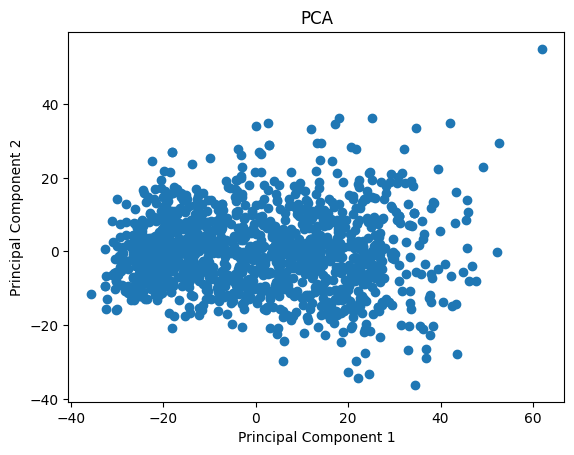

In [ ]:
# Select features for PCA
X = nba_df[['GP', 'MIN', 'PTS', 'FGM', 'FGA', 'FG%', '3P Made', '3PA', 'FTM', 'FTA', 'FT%',
                  'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK', 'TOV']]
# Perform PCA
pca = PCA(n_components=18)
X_pca = pca.fit_transform(X)

# Calculate explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Calculate cumulative explained variance ratio
cumulative_explained_variance_ratio = explained_variance_ratio.cumsum()

# Print the explained variance ratio and cumulative explained variance ratio
print("Explained Variance Ratio:", explained_variance_ratio[:3])
print("Cumulative Explained Variance Ratio:", cumulative_explained_variance_ratio[:3])

# Plot PCA results
plt.scatter(X_pca[:, 0], X_pca[:, 1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA')
plt.show()

From the PCA analysis, I found Explained Variance Ratio: [0.63120627 0.19337047 0.10385675] and Cumulative Explained Variance Ratio: [0.63120627 0.82457674 0.92843349] We see the explained variance ratio for each major component by analyzing the figure. The number of principle components is represented on the x-axis, while the cumulative explained variance ratio is represented on the y-axis.

In this instance, the first principal component (PC1) accounts for around 63.12% of the data variation. A further 19.34% of the variation is explained by the second main component (PC2), and roughly 10.39% is explained by the third principal component (PC3). The first three major components together account for around 92.84% of the total explained variation.

These numbers suggest that a significant portion of the variation in the dataset is captured by the first three main components. The inclusion of these three principle components offers a satisfactory approximation of the original data, according to the cumulative explained variance of 92.84%.







Task 3:
Get two features from the NBA dataset with a Gaussian distribution, can be done using each of the column variables distribution. Use GMM and EM algorithm in order to figure out the best parameters.


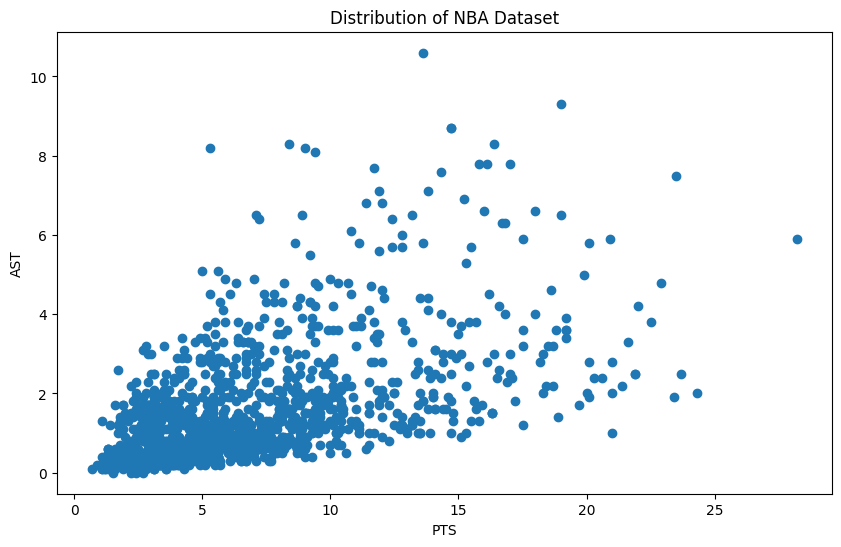

Gaussian Mixture Model (GMM):
[[10.20274669  2.83959347]
 [ 4.80778893  0.79491121]]

GMM Covariances:
[[[24.90227213  1.87025712]
  [ 1.87025712  2.83944589]]

 [[ 4.74313998  0.43943964]
  [ 0.43943964  0.22106802]]]


In [ ]:
# Select two features for GMM
feature_1 = 'PTS'  # Update with desired feature
feature_2 = 'AST'  # Update with desired feature

X = nba_df[[feature_1, feature_2]].values

# Visualize the distribution of the selected features
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1])
plt.xlabel(feature_1)
plt.ylabel(feature_2)
plt.title('Distribution of NBA Dataset')
plt.show()

# Gaussian Mixture Model
gmm = GaussianMixture(n_components=2, random_state=42)
gmm.fit(X)

# Print the GMM parameters
#Gaussian Mixture Model (GMM) using Expectation-Maximization (EM)
print("Gaussian Mixture Model (GMM):")
print(gmm.means_)
print("\nGMM Covariances:")
print(gmm.covariances_)


With values of around 24.90 and 2.84 on the diagonal elements and 1.87 on the off-diagonal elements, the covariance matrix of the first component indicates that the features are more variable than the other components.
The covariance matrix of the second component, which has values of around 4.74 and 0.22 on the diagonal components and 0.44 on the off-diagonal elements, implies a lesser variability between the characteristics.

Task 4:

Through the use of Monte Carlo Simulation, let'ssimulate a lot of dice rolls and calculate the outcomes depending on the betting instructions.

In [ ]:
#Load numpy library
import numpy as np

#Define my_roll_dice function
def my_roll_dice():
    return np.random.randint(1, 7, size=2)

def result(bet, roll_sum):
    if (bet == "even" and roll_sum % 2 == 0 and roll_sum % 4 != 0) or (bet == "odd" and roll_sum % 2 != 0 and not is_prime(roll_sum)):
        return "Win"
    else:
        return "Lose"

def is_prime(n):
    if n <= 1:
        return False
    for i in range(2, int(n**0.5) + 1):
        if n % i == 0:
            return False
    return True

def game(num_trials, bet):
    roll_sums = np.sum([my_roll_dice() for _ in range(num_trials)], axis=1)
    results = np.array([result(bet, roll_sum) for roll_sum in roll_sums])
    win_percentage = np.mean(results == "Win") * 100
    loss_percentage = np.mean(results == "Lose") * 100

    return win_percentage, loss_percentage

#total  number of trails assume 100000
num_trials = 100000
bet = "even"

win_percentage, loss_percentage = game(num_trials, bet)

print(f"Assume Win Percentage: {win_percentage:.2f}%")
print(f"Assume Loss Percentage: {loss_percentage:.2f}%")


Assume Win Percentage: 25.12%
Assume Loss Percentage: 74.88%
